# Importing Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

# Data collecting and Preprocessing

## Define the Problem

    
- The task is to build a machine learning model to predict house prices based on multiple features (e.g., square footage, neighborhood,
  number of bedrooms, etc.).This is a regression problem, where the goal is to predict a continuous value (price).

## Data collection

- We need data that contains features (input variables) and the target variable (house price).

In [3]:
data=pd.read_csv(r"C:\Users\Dell\OneDrive\Nareshit\DataScienceandAI\Datafiles\House Price Prediction.csv")
data

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


## Data Cleaning and Preprocessing

### Basic Inspection on the Dataset

In [6]:
# Getting some basic information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [8]:
# Getting the statistical measures of the data
data.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [10]:
# All column names
data.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [12]:
# Getting number of rows and columns
data.shape

(2000, 10)

In [14]:
# Getting total size of the data (rows x columns)
data.size

20000

In [16]:
# Print first five rows of the dataframe
data.head(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [18]:
# Print last five rows of the dataframe
data.tail(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [20]:
data.dtypes

Id            int64
Area          int64
Bedrooms      int64
Bathrooms     int64
Floors        int64
YearBuilt     int64
Location     object
Condition    object
Garage       object
Price         int64
dtype: object

In [22]:
# Categorical column names
cat=data.select_dtypes(include='object').columns
cat

Index(['Location', 'Condition', 'Garage'], dtype='object')

In [24]:
# Numerical column names
num=data.select_dtypes(exclude='object').columns
num

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price'], dtype='object')

In [26]:
# Finding the missing values
#There are several strategies you can use to handle missing values, depending on the nature of the data (numerical or categorical) 
#and the context of the problem.
data.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [28]:
# One-hot encode categorical variables (if any)
data = pd.get_dummies(data, drop_first=True)

**Correlation**

<Axes: >

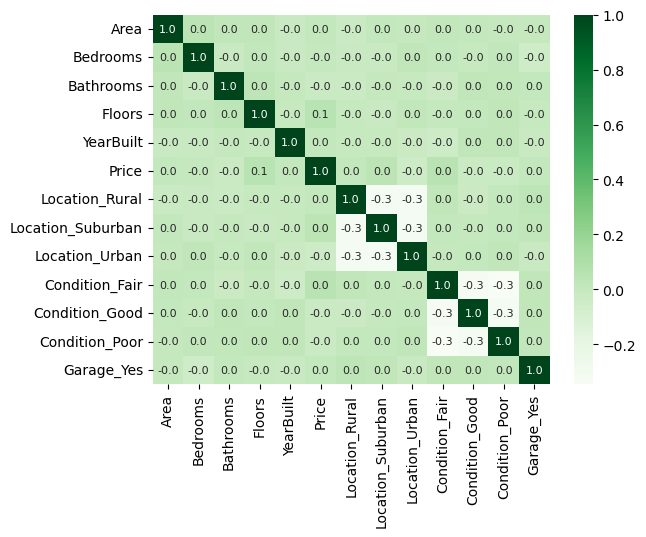

In [30]:
price_data=data.drop("Id",axis=1)
correlation=price_data.corr()
# Construct the heatmap to understand the correlation
sns.heatmap(correlation,cbar=True,annot=True,fmt=".1f",annot_kws={"size":8},cmap="Greens")

In [32]:
# Correlation values of House
print(correlation['Area'])

Area                 1.000000
Bedrooms             0.047523
Bathrooms            0.021881
Floors               0.017749
YearBuilt           -0.011609
Price                0.001542
Location_Rural      -0.017328
Location_Suburban    0.003404
Location_Urban       0.000010
Condition_Fair       0.012805
Condition_Good       0.001289
Condition_Poor      -0.003387
Garage_Yes          -0.003441
Name: Area, dtype: float64


<Axes: xlabel='Area', ylabel='Count'>

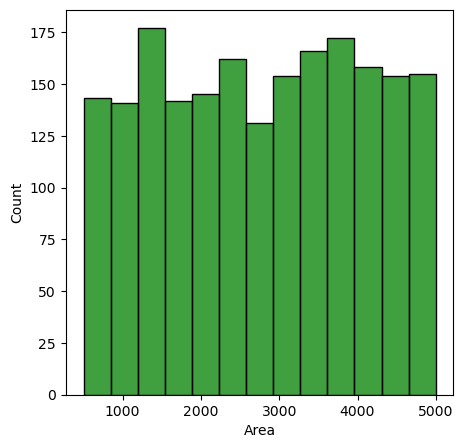

In [34]:
# Check the distribution price of the House
plt.figure(figsize=(5,5))
sns.histplot(data['Area'],color="green")

# Split the data into features and targets

In [36]:
# Separate features (X) and target variable (y)
X = data.drop('Price', axis=1)  # Drop target variable 'price'
y = data['Price']  # Target variable

In [38]:
print(X)

        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location_Rural  \
0        1  1360         5          4       3       1970           False   
1        2  4272         5          4       3       1958           False   
2        3  3592         2          2       3       1938           False   
3        4   966         4          2       2       1902           False   
4        5  4926         1          4       2       1975           False   
...    ...   ...       ...        ...     ...        ...             ...   
1995  1996  4994         5          4       3       1923           False   
1996  1997  3046         5          2       1       2019           False   
1997  1998  1062         5          1       2       1903            True   
1998  1999  4062         3          1       2       1936           False   
1999  2000  2989         5          1       3       1903           False   

      Location_Suburban  Location_Urban  Condition_Fair  Condition_Good  \
0           

In [40]:
print(y)

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 2000, dtype: int64


# Splitting into Train data and Test data

In [42]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 13), (400, 13), (1600,), (400,))

## Feature Scaling

In [44]:
# Feature Scaling (Important for linear regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Development

In [46]:
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Model Evaluation

In [48]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [50]:
# Evaluate the model performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [52]:
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R^2: {r2_xgb}")

XGBoost RMSE: 318776.81087570416
XGBoost R^2: -0.30617213249206543


In [54]:
# Hyperparameter Tuning for XGBoost 
from sklearn.model_selection import cross_val_score, GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           scoring='neg_mean_squared_error')

# Fit grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best XGBoost Parameters: {best_params}")

# Train the model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Make predictions with optimized XGBoost model
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the optimized XGBoost model
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mse_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"Optimized XGBoost RMSE: {rmse_best_xgb}")
print(f"Optimized XGBoost R^2: {r2_best_xgb}")

Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Optimized XGBoost RMSE: 280034.5326296022
Optimized XGBoost R^2: -0.007975935935974121


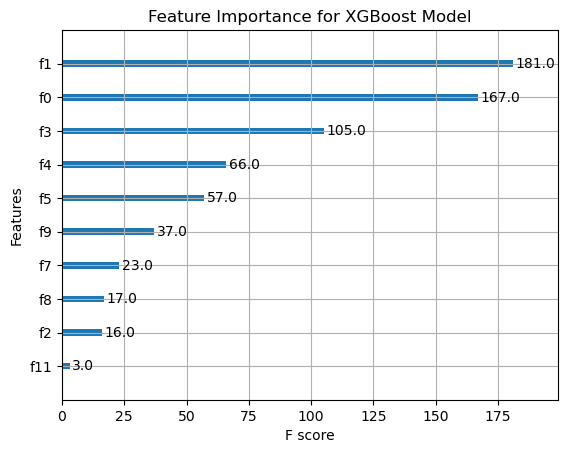

In [55]:
# Plot feature importance for XGBoost
import matplotlib.pyplot as plt
xgb.plot_importance(best_xgb_model)
plt.title('Feature Importance for XGBoost Model')
plt.show()

# Comparing Actual values and Predicted values in a plot

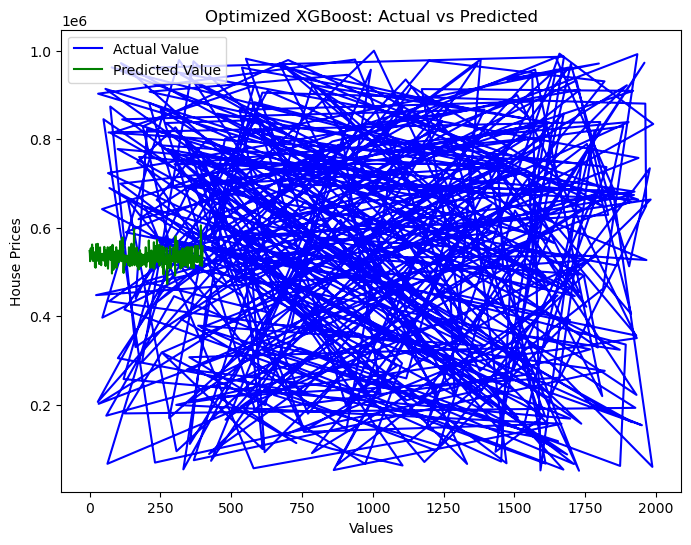

In [58]:
# Visualize Actual vs Predicted Prices for  XGBoost Model
plt.figure(figsize=(8, 6))

# Optimized XGBoost
plt.plot(y_test,color='blue', label='Actual Value')
plt.plot(y_pred_best_xgb,color='green',label='Predicted Value')
plt.title('Optimized XGBoost: Actual vs Predicted')
plt.xlabel('Values')
plt.ylabel('House Prices')
plt.legend()
plt.show()

# Load the Model

In [60]:
# Load the model using pickle
pickle.dump(xgb_model,open("house_price_prediction.pkl","wb"))

In [62]:
model=pickle.load(open("house_price_prediction.pkl","rb"))
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)